# Dados Ausentes

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
url = ("https://hbiostat.org/data/repo/titanic3.csv")
df = pd.read_csv(url)

In [52]:
df.isnull().sum() * 100 / len(df) # Porcentagem de valores nulos por coluna

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

## Missingno

A biblioteca missingno oferece uma maneira realmente agradável de visualizar dados ausentes e padrões de dados ausentes.

In [53]:
import missingno as msno

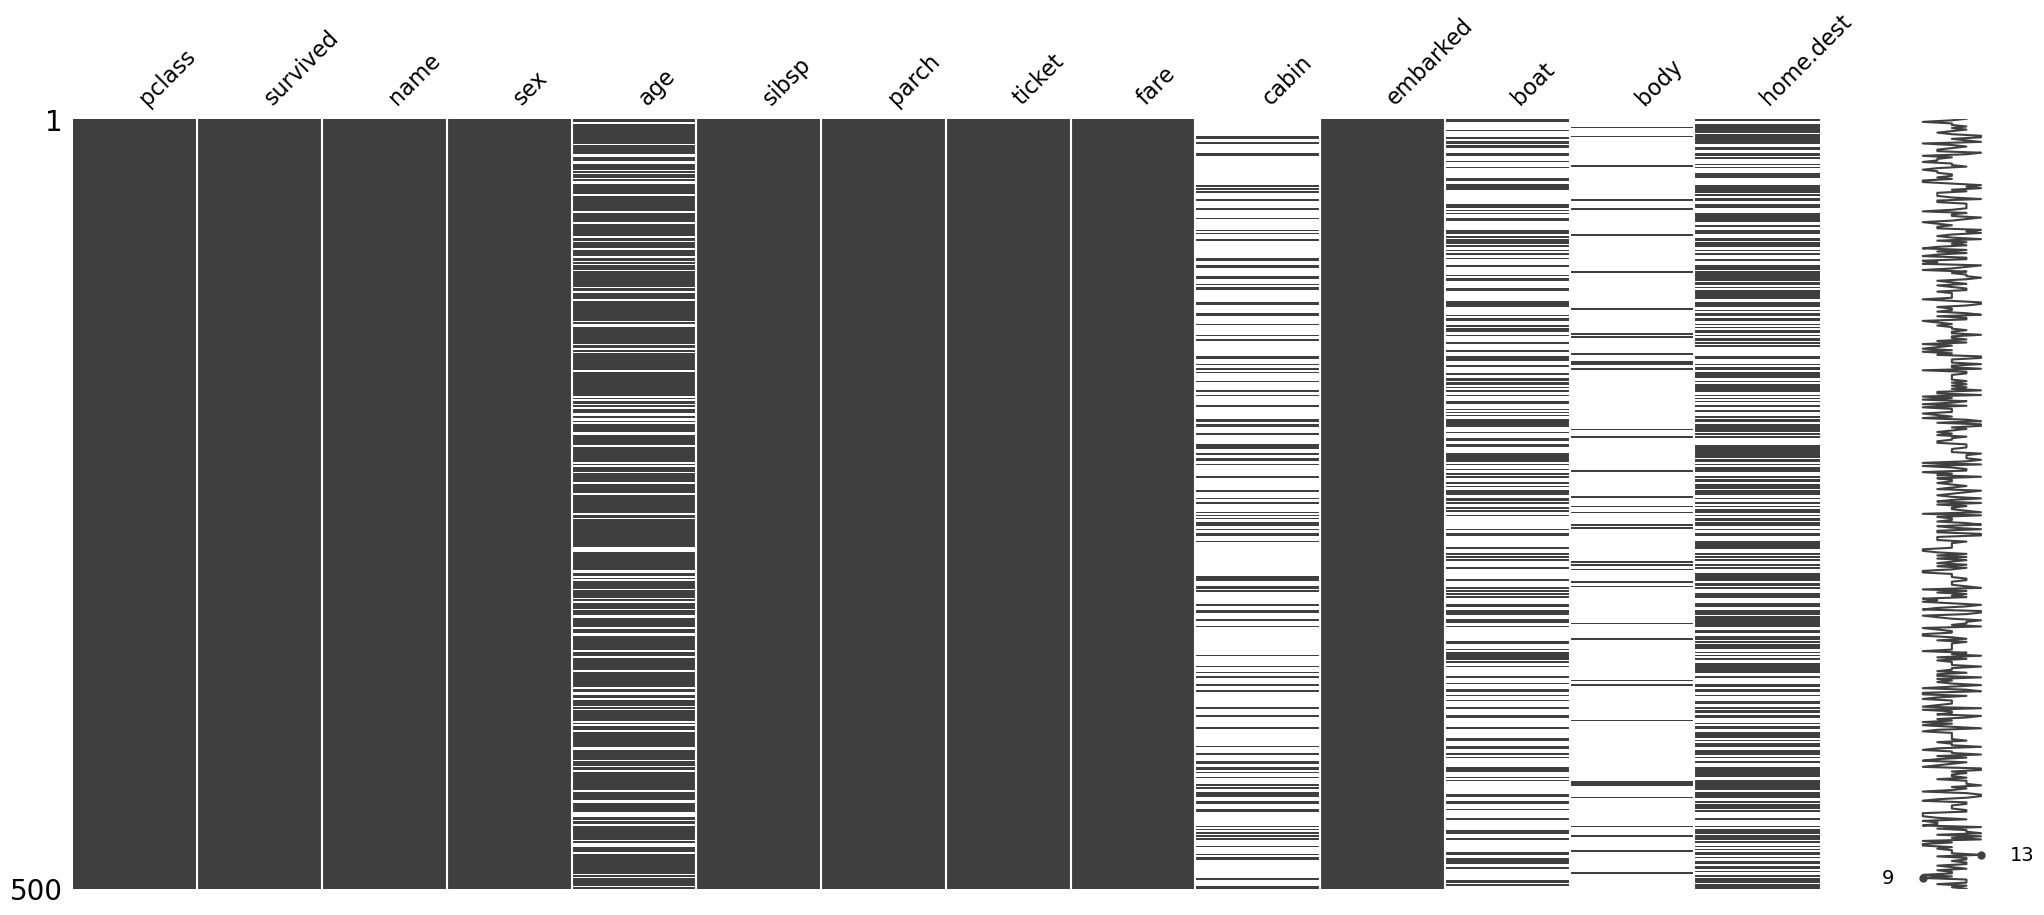

In [54]:
ax = msno.matrix(df.sample(500)) # Matriz de valores nulos. 500 amostras

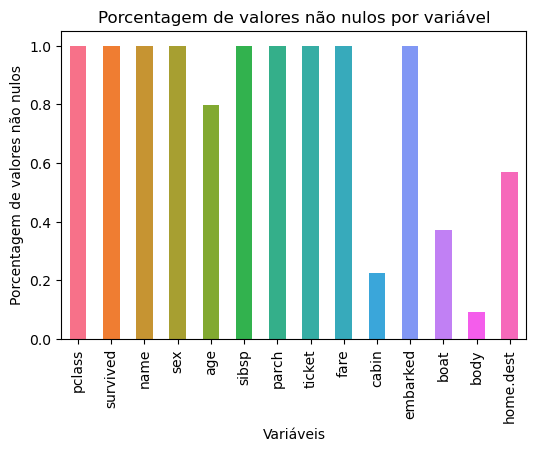

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))

data = (1 - df.isnull().mean()).abs()

colors = sns.color_palette('husl', len(data))

data.plot(kind='bar', ax=ax, color=colors)

plt.xlabel("Variáveis")
plt.ylabel("Porcentagem de valores não nulos")
plt.title("Porcentagem de valores não nulos por variável")

plt.show()

O gráfico acima é interessante. Se observar, as variáveis `body` e `cabin` tem muitos dados ausentes, entretanto, isso não é necessáriamente um problema, pois estas variáveis são leaks do futuro (são variáveis que só existem após o evento que queremos prever acontecer). Porém a variávei `age` tem muitos dados ausentes e é uma variável que pode ser importante para o modelo.

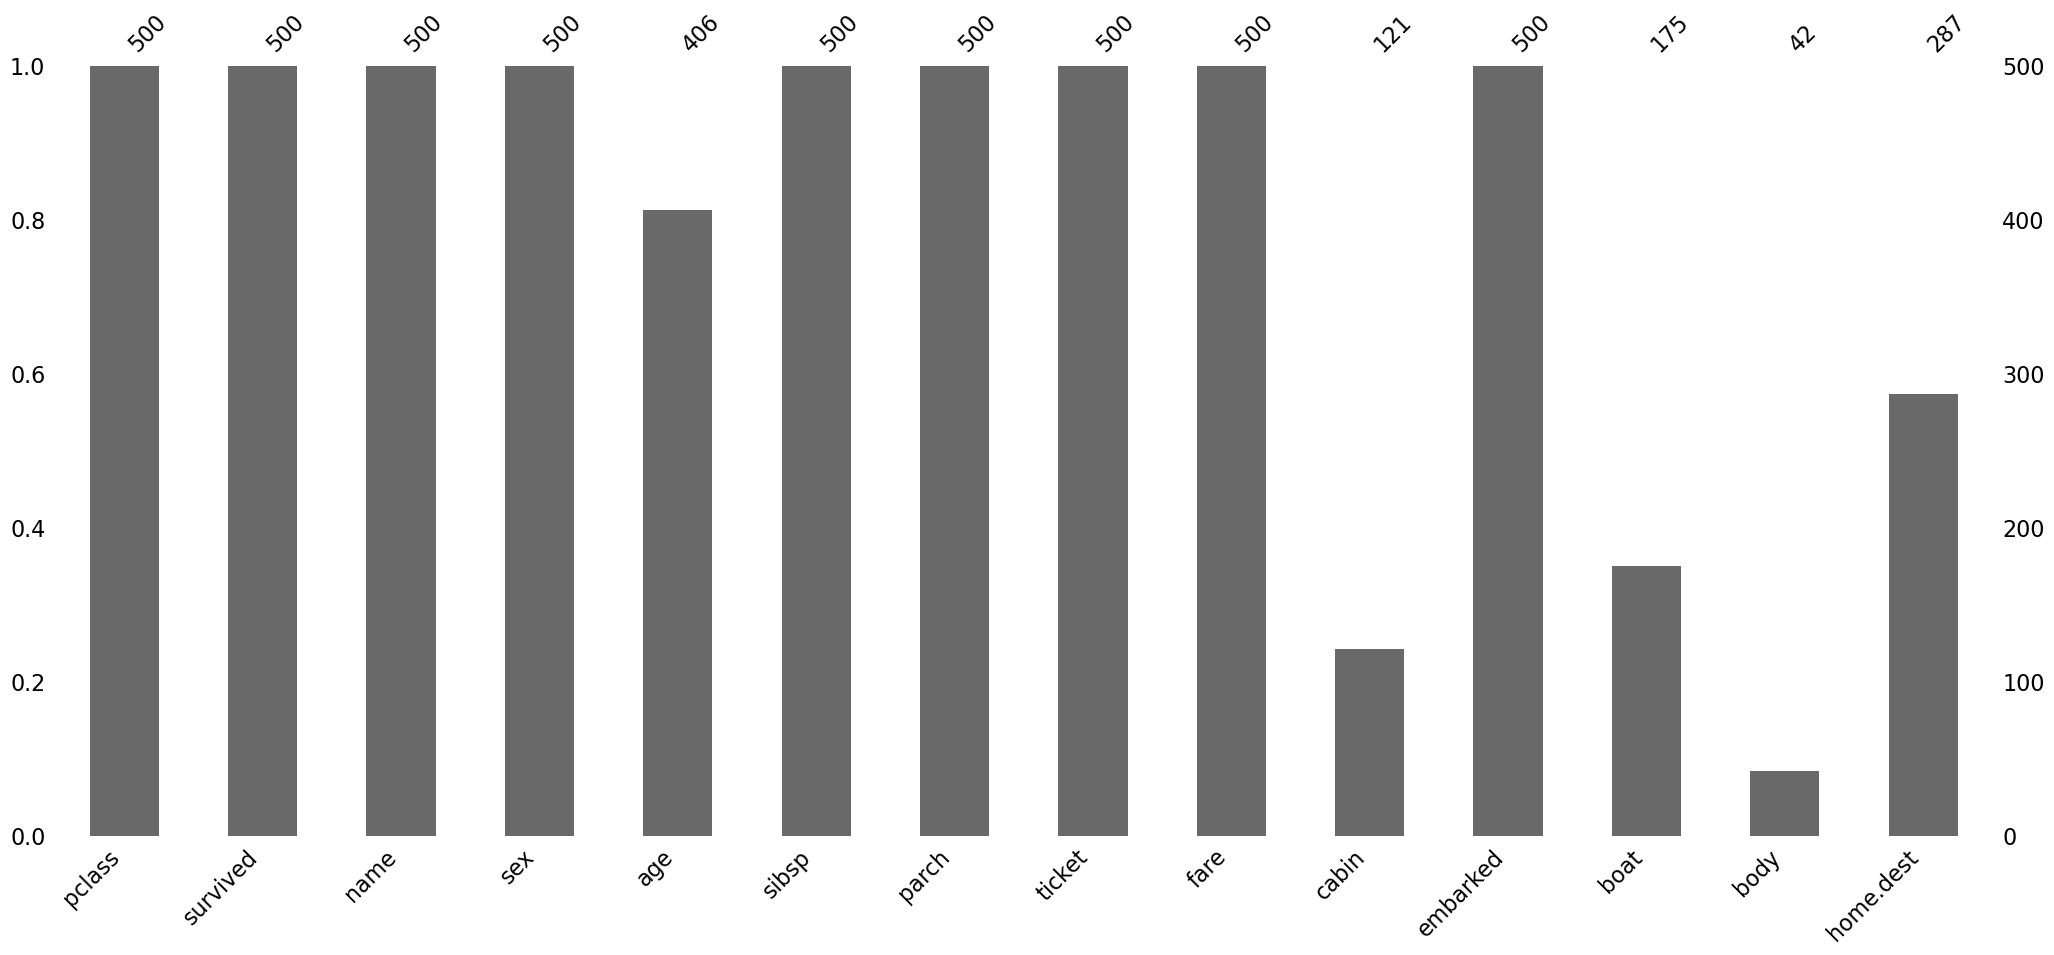

In [57]:
ax = msno.bar(df.sample(500)) 

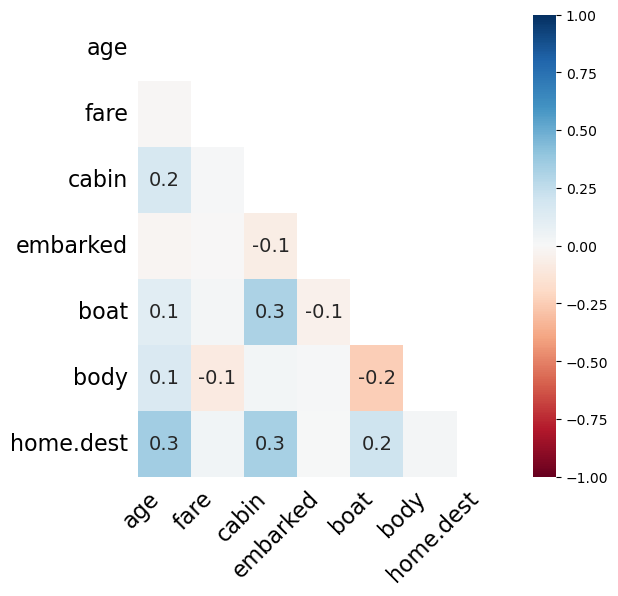

In [59]:
ax = msno.heatmap(df, figsize=(6, 6))

Um mapa de calor é uma representação gráfica de dados onde os valores individuais contidos em uma matriz são representados como cores.

Ele é útil para identificar correlações entre variáveis.

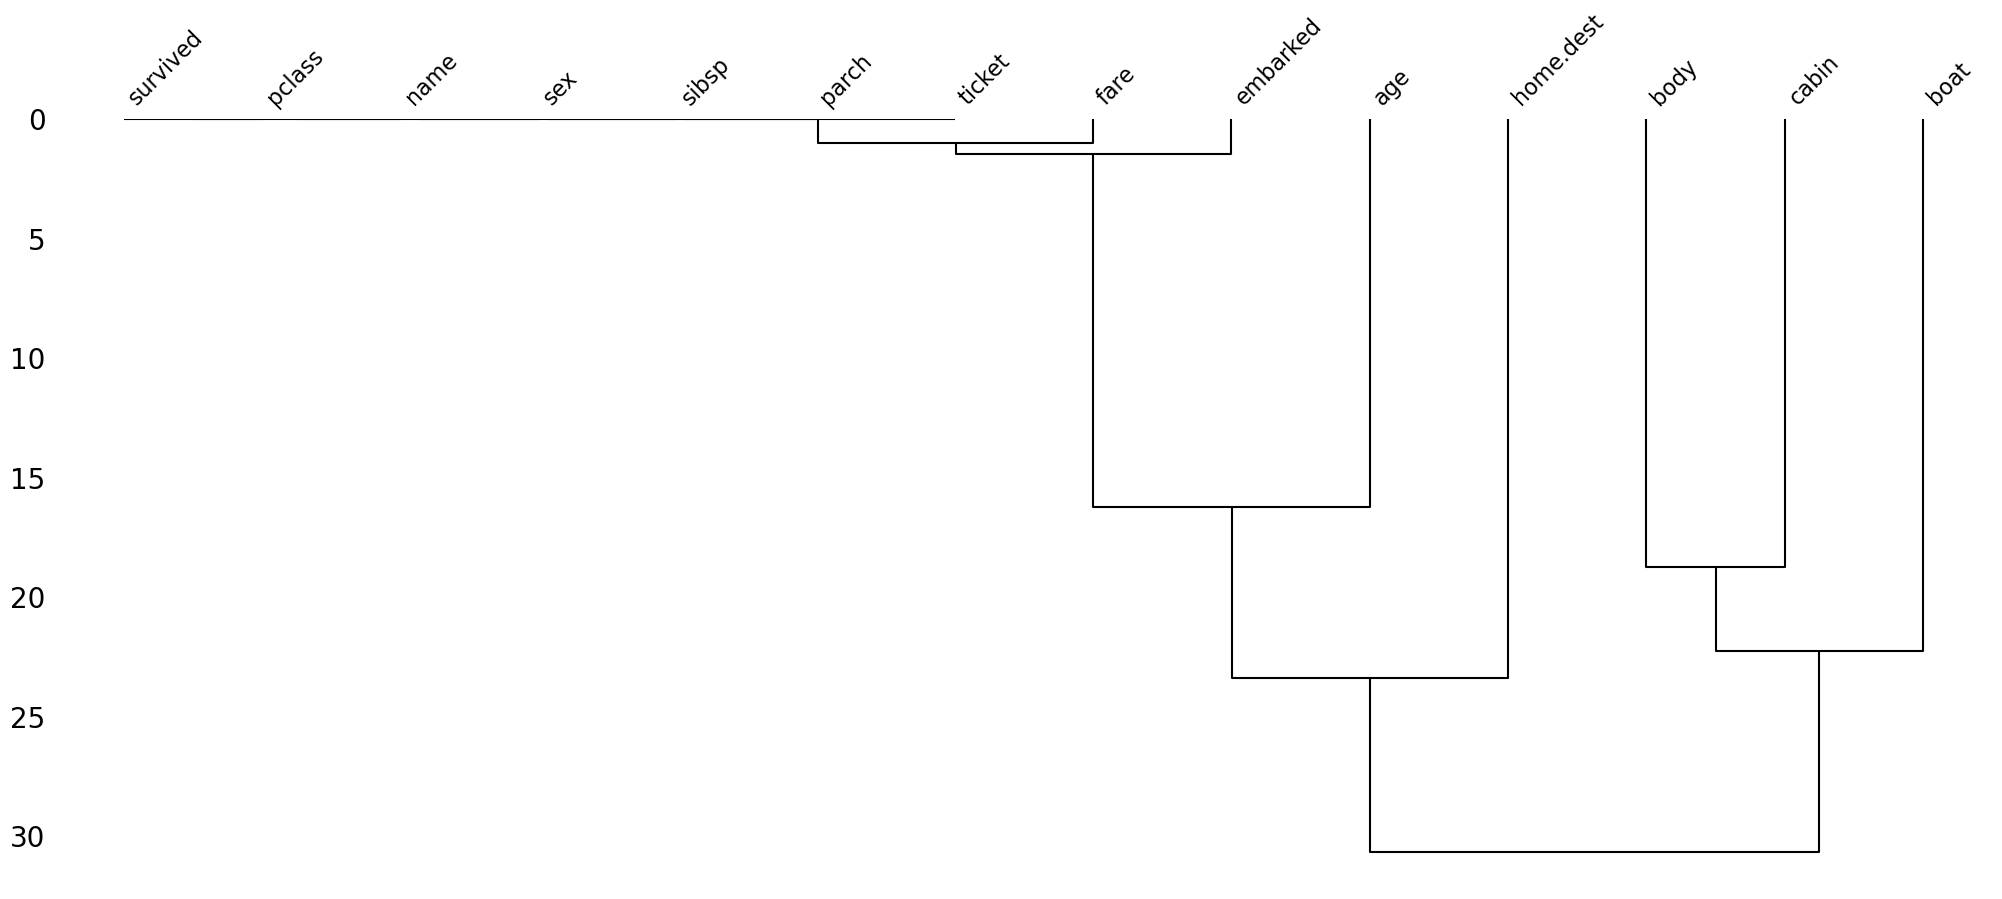

In [60]:
ax = msno.dendrogram(df)

Um dendograma é um tipo de diagrama de árvore que mostra o relacionamento entre conjuntos de dados semelhantes. Ele também é conhecido como o diagrama de árvore de filiação.

## Descartando Dados Ausentes

Uma das maneiras de lidar com dados ausentes é descartar as variáveis que tem dados ausentes.

É necessário lidar com dados ausentes, pois a maioria dos modelos não consegue aprender com dados ausentes.

A biblioteca Pandas tem um método chamado `dropna()` que permite descartar dados ausentes.

In [61]:
df1 = df.dropna() # Remove linhas com valores nulos

Além disso, pode ser observado as colunas que possuem dados ausentes e remove-las com o método `drop()`.

In [62]:
df1 = df.drop(columns=['cabin']) # Remove coluna cabin

## ou

df1 = df.dropna(axis=1) # Remove colunas com valores nulos

No geral não é uma boa prática descartar dados, pois podemos perder informações importantes.

## Imputação de Dados Ausentes

No geral pode-se utilizar a classe `SimpleImputer` do scikit-learn para imputar dados ausentes.

Por padrão, o `SimpleImputer` substitui os valores ausentes pela média dos valores da coluna.

O `SimpleImputer` também pode ser utilizado para substituir os valores ausentes por uma constante, valor mais frequente ou valor mais frequente ao longo do eixo, mediana ou mediana ao longo do eixo.

In [63]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(
    include = "number"
).columns # Seleciona colunas numéricas

impute = SimpleImputer() # Preenche valores nulos com a média

imputed = impute.fit_transform(df[num_cols])

Caso deseja-se substituir os valores nulos pelo valor mais frequente basta adicionar o parâmetro `strategy='most_frequent'` na classe `SimpleImputer`.

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
```

Lembrando que a estratégia de média requer que todas as características sejam numéricas. Para caso de strings é comum utilizar a estratégia de valor mais frequente.

O `IterativeImputer` aceita transformação após a adequação, o que significa que pode ser usado em um pipeline.

### Colunas informativas

A ausência de dados pode ser um indicador para o modelo, mas a biblioteca de pandas é capaz de acrescentar uma nova coluna para indicar se o valor é ausente ou não.

In [64]:
def add_indicator(col): # passa como parâmetro a coluna a ser criada
    def wrapper(df): # parâmetro é o dataframe
        return df[col].isna().astype(int) # Cria coluna indicadora
    return wrapper # Retorna a função


In [65]:
df1 = df.assign(cabin_missing=add_indicator("cabin")) # Adiciona coluna indicadora

In [66]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1
